#libraries

In [12]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#Reading data

In [13]:
data_train = pd.read_csv('/content/data/input/train.csv')
data_test = pd.read_csv('/content/data/input/test.csv')

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Cleaning

In [14]:

passenger_id = data_test['PassengerId']
data_train = data_train.drop(['PassengerId', 'Ticket'], axis=1)
data_test = data_test.drop(['PassengerId', 'Ticket'], axis=1)
data_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


#Featuring Extracting

In [15]:
#input: Dataset
#output: cleaned dataset with renamed titles and 
def feature_extract(dataset):
  
  dataset['Name'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
  
  dataset = dataset.rename(columns = {'Name': "Title"})

  dataset["Title"] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major',
                                               'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  dataset['Title'] = dataset['Title'].replace('Mile', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

  dataset['IsAlone'] = 0
  dataset.loc[dataset['SibSp'] + dataset['Parch'] == 0, 'Is Alone'] = 1
  dataset = dataset.drop(['SibSp', 'Parch'], axis =1)
  dataset['Cabin'] = dataset['Cabin'].str.extract('([A-Za-z]+)', expand = False)
  
  return dataset


In [16]:
data_train = feature_extract(data_train)
data_test = feature_extract(data_test)
data_train.head()

,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,IsAlone,Is Alone
0,0,3,Mr,male,22.0,7.2500,NaN,S,0,NaN
1,1,1,Mrs,female,38.0,71.2833,C,C,0,NaN
2,1,3,Miss,female,26.0,7.9250,NaN,S,0,1.0
3,1,1,Mrs,female,35.0,53.1000,C,S,0,NaN
4,0,3,Mr,male,35.0,8.0500,NaN,S,0,1.0


#Filling missing data

In [17]:
from sklearn.impute import SimpleImputer

def clean_missing_data(dataset):
  #replace missing  age and fare values with the mean
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
  dataset['Age'] = imputer.fit_transform(dataset[['Age']])
  dataset['Fare'] = imputer.fit_transform(dataset[['Fare']])
  #replace missing embarked information with most frequent
  imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
  dataset['Embarked'] = imputer.fit_transform(dataset[['Embarked']])

  dataset['Cabin'] = dataset['Cabin'].fillna('N')
  dataset['Title'] = dataset['Title'].fillna('Non')
  return dataset


In [18]:
data_train = clean_missing_data(data_train)
data_test  = clean_missing_data(data_test)
data_train.head()

,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,IsAlone,Is Alone
0,0,3,Mr,male,22.0,7.2500,N,S,0,NaN
1,1,1,Mrs,female,38.0,71.2833,C,C,0,NaN
2,1,3,Miss,female,26.0,7.9250,N,S,0,1.0
3,1,1,Mrs,female,35.0,53.1000,C,S,0,NaN
4,0,3,Mr,male,35.0,8.0500,N,S,0,1.0


#Encoding with ordinal based

In [27]:
def encode_ordinal(dataset):


  #dataset['Title'] = dataset['Title'].map(
  #    {'Non'   : 0,
  #     'Mr'     : 1,
  #     'Miss'   : 2,
  #     'Mrs'    : 3,
  #     'Master' : 4,
  #     'Rare'   : 5}).astype(int)
  #dataset['Title']  = dataset['Title'].astype(int)
  dataset['Sex']    = dataset['Sex'].map(
      {'female' : 1,
       'male'   : 0}
  ).astype(int)
  dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
  dataset['Age'] = dataset['Age'].astype(int)

  dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
  dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
  dataset['Fare'] = dataset['Fare'].astype(int)

  dataset['Cabin'] = dataset['Cabin'].map(
      {"N": 0, "A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8})
  dataset['Cabin'] = dataset['Cabin'].astype(int)

  dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
  return dataset


In [28]:
data_train = encode_ordinal(data_train)
data_test = encode_ordinal(data_test)
data_train.head()

,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,IsAlone,Is Alone
0,0,3,1.0,0,1,0,0,0,0,NaN
1,1,1,3.0,1,2,3,3,1,0,NaN
2,1,3,2.0,1,1,1,0,0,0,1.0
3,1,1,3.0,1,2,3,3,0,0,NaN
4,0,3,1.0,0,2,1,0,0,0,1.0


,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,IsAlone,Is Alone
0,0,3,1.0,0,1,0,0,0,0,NaN
1,1,1,3.0,1,2,3,3,1,0,NaN
2,1,3,2.0,1,1,1,0,0,0,1.0
3,1,1,3.0,1,2,3,3,0,0,NaN
4,0,3,1.0,0,2,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,5.0,0,1,1,0,0,0,1.0
887,1,1,2.0,1,1,2,2,0,0,1.0
888,0,3,2.0,1,1,2,0,0,0,NaN
889,1,1,1.0,0,1,2,3,1,0,1.0


#Correlation

Text(0.5, 1.0, 'Correlation heatmap')

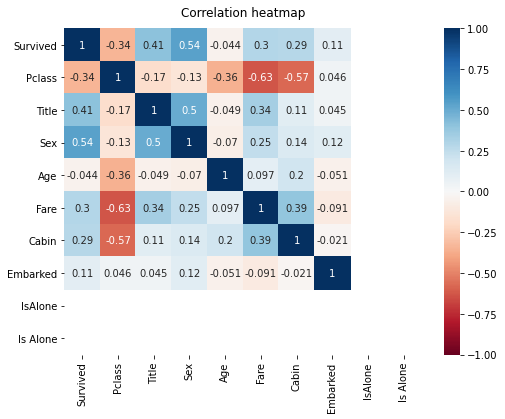

In [30]:
plt.figure(figsize = (8,6))
heatmap = sns.heatmap(data_train.corr(), vmin = -1, annot = True, cmap = 'RdBu')
heatmap.set_title('Correlation heatmap', fontdict = { 'fontsize':12}, pad = 12)

#Train and test split

In [39]:
data_train = data_train.dropna()
data_test = data_test.dropna()

In [40]:
from sklearn.model_selection import train_test_split
x = data_train.iloc[:, 1:].values
y = data_train.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

#Model Training

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print(accuracy_score(y_test, y_pred))

[[85 10]
 [10 29]]
0.8507462686567164
